# Violent Crime Rates by US State
This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas. The goal of this project is to identify hierarchies of clusters of US states according to violent crime rates data [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html). Feel free to augment this data set with other sources. 

In [ ]:
import pandas as pd
violent_crime = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")
violent_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Del enlace anterior se obtuvo la siguiente descripción de los atributos:

[,1] 	Murder 	numeric 	Murder arrests (per 100,000)

[,2] 	Assault 	numeric 	Assault arrests (per 100,000)

[,3] 	UrbanPop 	numeric 	Percent urban population

[,4] 	Rape 	numeric 	Rape arrests (per 100,000) 


In [ ]:
vc= violent_crime

In [ ]:
#Cambio el nombre de la columna cero por "state"
vc.rename(columns = {'Unnamed: 0':'state'}, inplace = True)

In [ ]:
violent_crime.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
vc.groupby("state").mean()

,Murder,Assault,UrbanPop,Rape
state,,,,
Alabama,13.2,236.0,58.0,21.2
Alaska,10.0,263.0,48.0,44.5
Arizona,8.1,294.0,80.0,31.0
Arkansas,8.8,190.0,50.0,19.5
California,9.0,276.0,91.0,40.6
Colorado,7.9,204.0,78.0,38.7
Connecticut,3.3,110.0,77.0,11.1
Delaware,5.9,238.0,72.0,15.8
Florida,15.4,335.0,80.0,31.9


In [ ]:
X_raw= vc.iloc[:,[1, 2, 3, 4]]

In [ ]:
X_raw.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


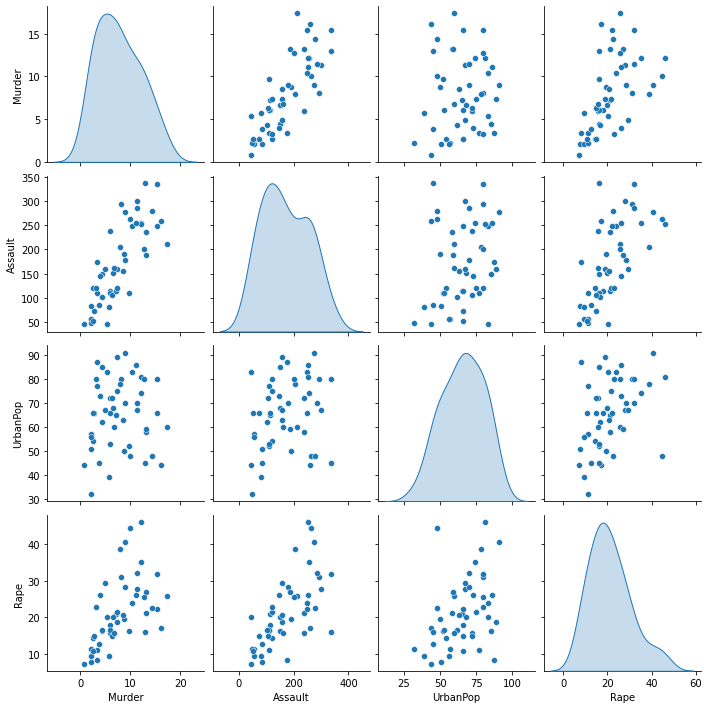

In [ ]:
import seaborn as sns
sns.pairplot(X_raw, diag_kind="kde")


## Clustering
A partir de los 4 datos de Asesinatos, Asaltos, Poblabción Urbana y Secuestros. Se va a a diferenciar clases. De acuerdo a la peligrosidad de cada estado.
Este TP se va a resolver a partir de técnicas de clustering.
Se van a probar diferentes técnicas, con diferentes parámetros.

# Kmeans
Se va utilizar Kmeans y se va a variar la cantidad de cluster de 2 a 5.

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns


In [ ]:
k_means = KMeans(init="k-means++", n_clusters=2, n_init=10)
k_means.fit(X_raw)
y_pred = k_means.fit_predict(X_raw)
clases= y_pred
clases

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
X_clustering = X_raw.assign(Clases=clases)

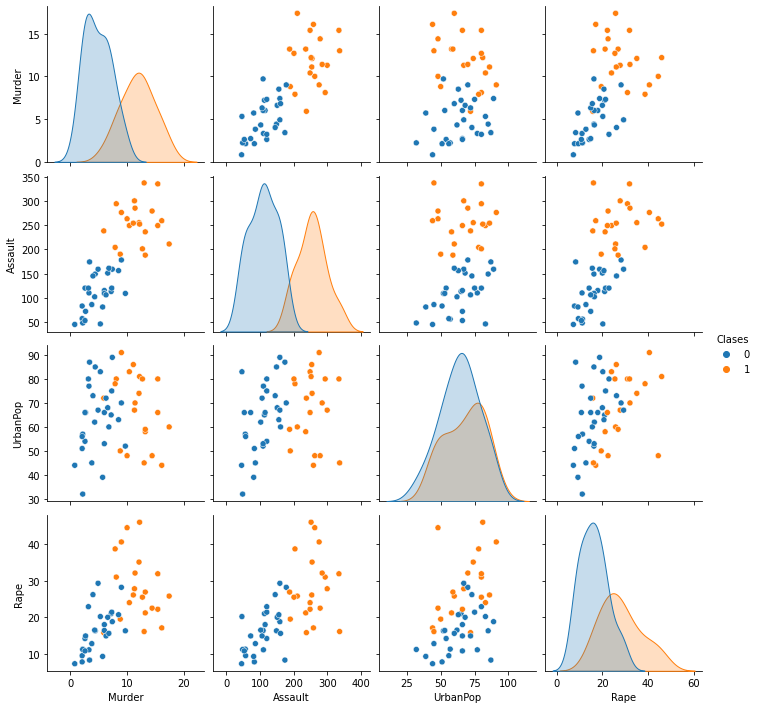

In [ ]:
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10")


In [ ]:
k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)
k_means.fit(X_raw)
y_pred = k_means.fit_predict(X_raw)
clases= y_pred
clases

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
X_clustering = X_raw.assign(Clases=clases)

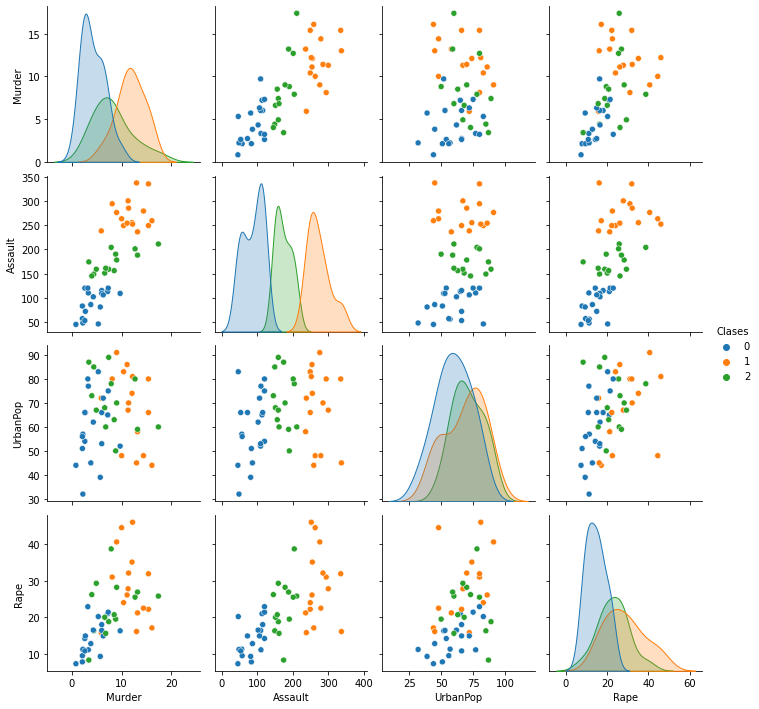

In [ ]:
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10")


In [ ]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=10)
k_means.fit(X_raw)
y_pred = k_means.fit_predict(X_raw)
clases= y_pred
clases

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 2, 1,
       3, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [ ]:
X_clustering = X_raw.assign(Clases=clases)

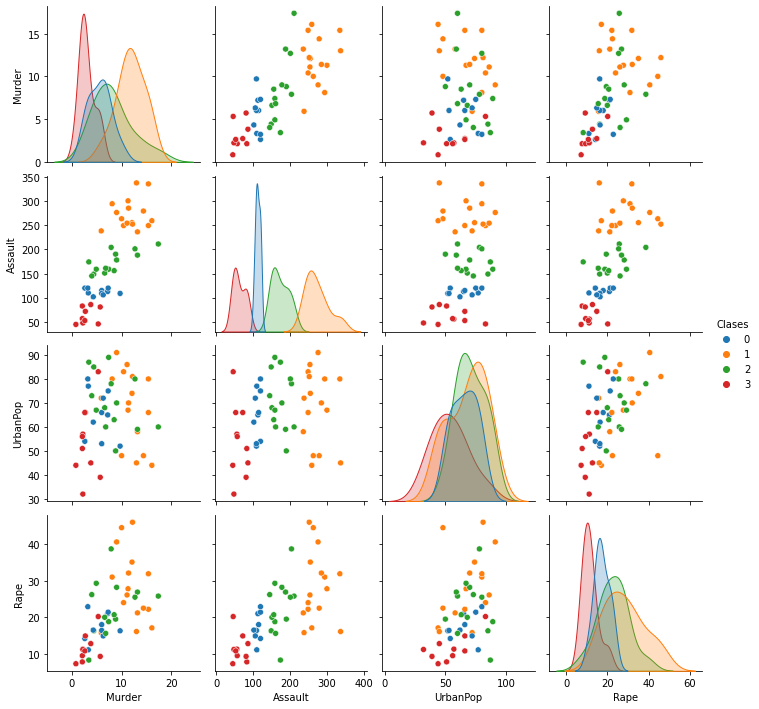

In [ ]:
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10")


In [ ]:
k_means = KMeans(init="k-means++", n_clusters=5, n_init=10)
k_means.fit(X_raw)
y_pred = k_means.fit_predict(X_raw)
clases= y_pred
clases

array([0, 0, 4, 2, 0, 2, 1, 0, 4, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 4, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 4, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [ ]:
X_clustering = X_raw.assign(Clases=clases)

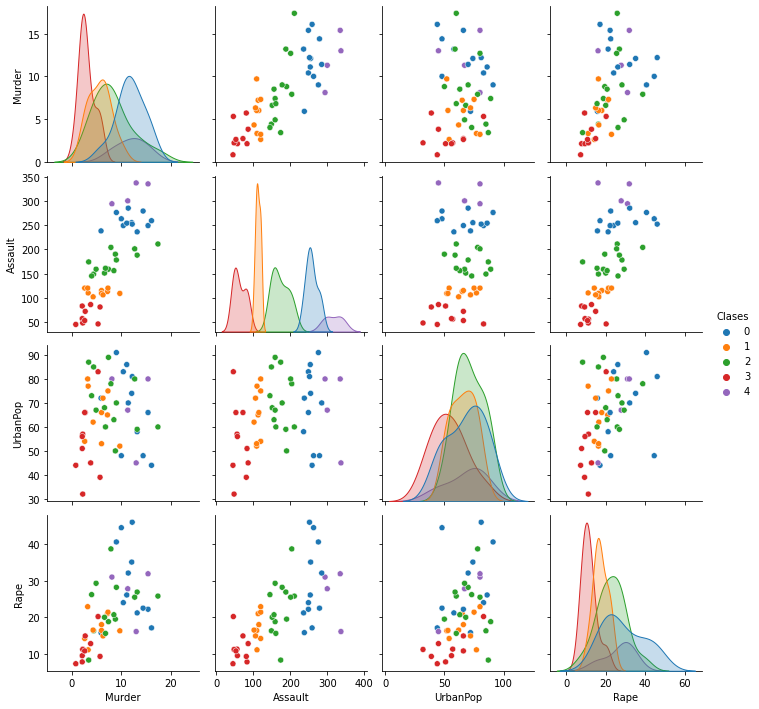

In [ ]:
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10")


#Kmeans con PCA
Kmeans, pero primero se reduce la dimensionalidad con PCA a 2.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_raw)

PCA(n_components=2)

In [ ]:
pca.explained_variance_ratio_

array([0.96553422, 0.02781734])

In [ ]:
X_transform= pca.transform(X_raw)

In [ ]:
k_means = KMeans(init="k-means++", n_clusters=2, n_init=10)
k_means.fit(X_transform)
y_pred = k_means.fit_predict(X_transform)
clases= y_pred
clases

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

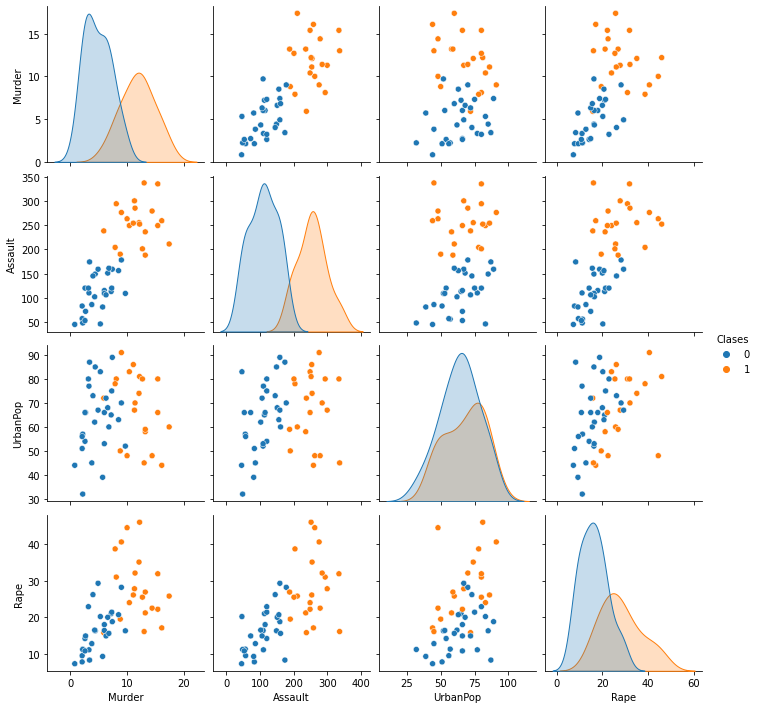

In [ ]:
X_clustering = X_raw.assign(Clases=clases)
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10")


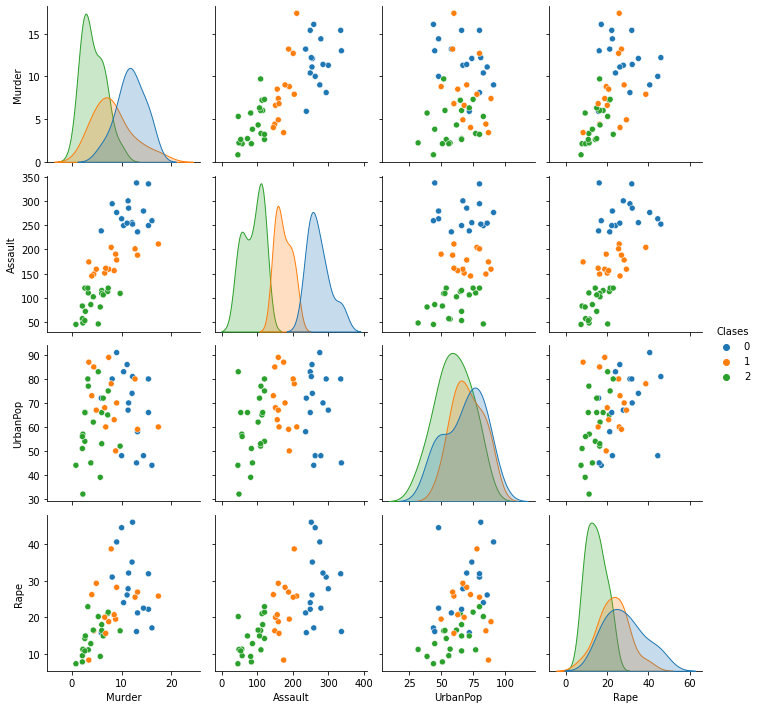

In [ ]:
k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)
k_means.fit(X_transform)
y_pred = k_means.fit_predict(X_transform)
clases= y_pred
X_clustering = X_raw.assign(Clases=clases)
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10")

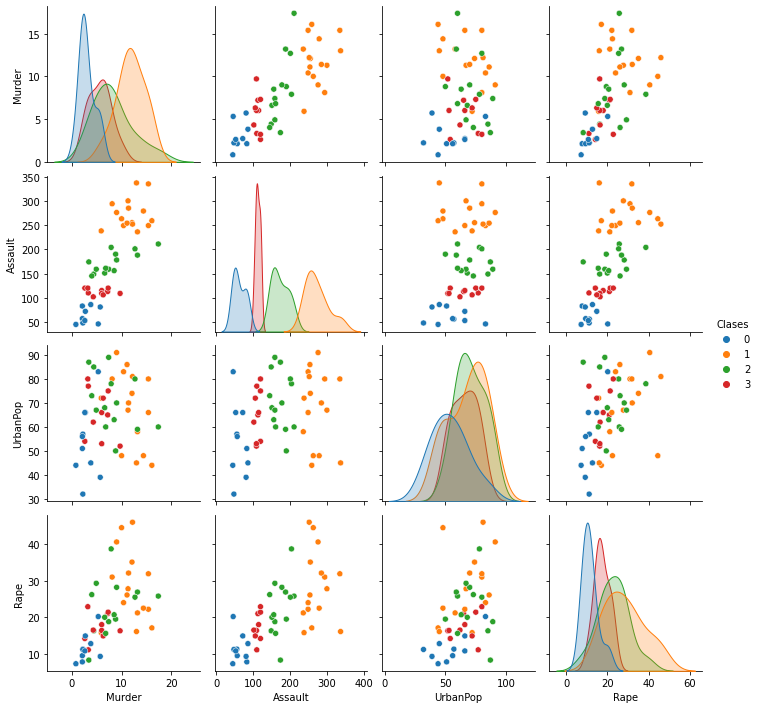

In [ ]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=10)
k_means.fit(X_transform)
y_pred = k_means.fit_predict(X_transform)
clases= y_pred
X_clustering = X_raw.assign(Clases=clases)
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10")

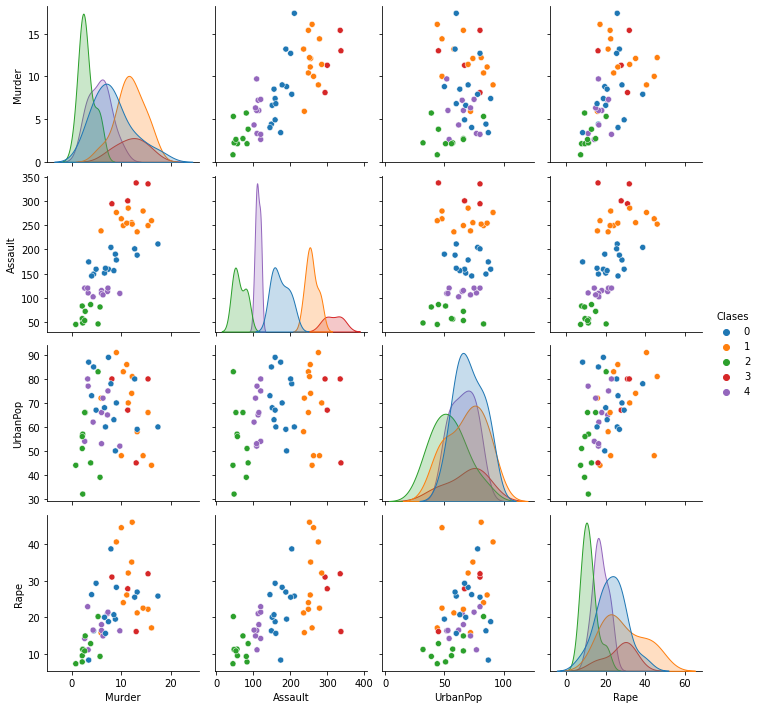

In [ ]:
k_means = KMeans(init="k-means++", n_clusters=5, n_init=10)
k_means.fit(X_transform)
y_pred = k_means.fit_predict(X_transform)
clases= y_pred
X_clustering = X_raw.assign(Clases=clases)
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10")

#DBSCAN
Se utilizar standarscaler, para restar el valor medio y dividir por el desvío standar.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


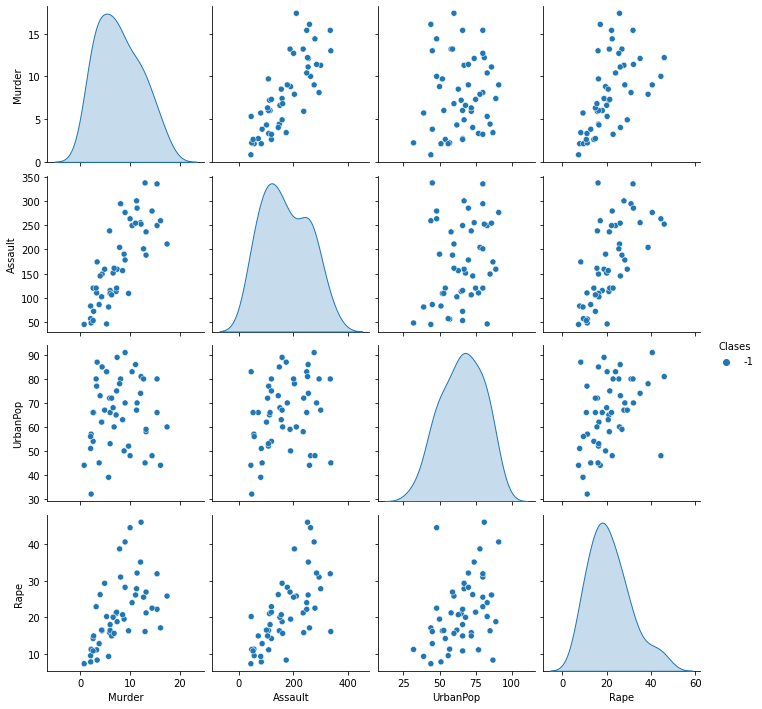

In [ ]:
db_cluster= DBSCAN(eps=0.3, min_samples=10)
from sklearn.preprocessing import StandardScaler
X_stand = StandardScaler().fit_transform(X_raw)
db_cluster.fit(X_stand)
y_pred = db_cluster.fit_predict(X_stand)
clases= y_pred
X_clustering = X_raw.assign(Clases=clases)
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10")

In [ ]:
clases

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

#Cluster Alglomerativo

In [ ]:
from sklearn.cluster import AgglomerativeClustering


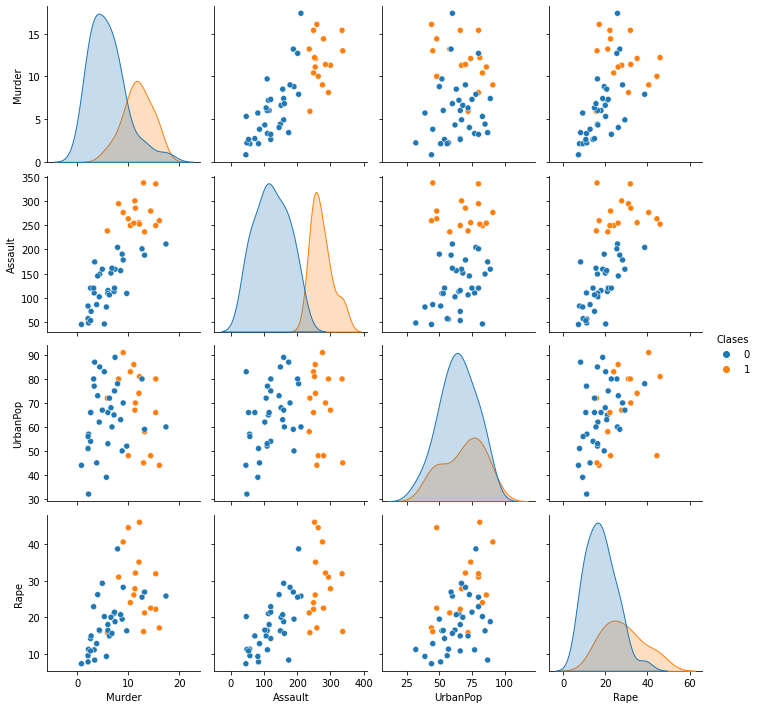

In [ ]:
ag_clustering = AgglomerativeClustering(n_clusters=2).fit(X_raw)
y_pred = ag_clustering.fit_predict(X_raw)
clases= y_pred
X_clustering = X_raw.assign(Clases=clases)
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10")

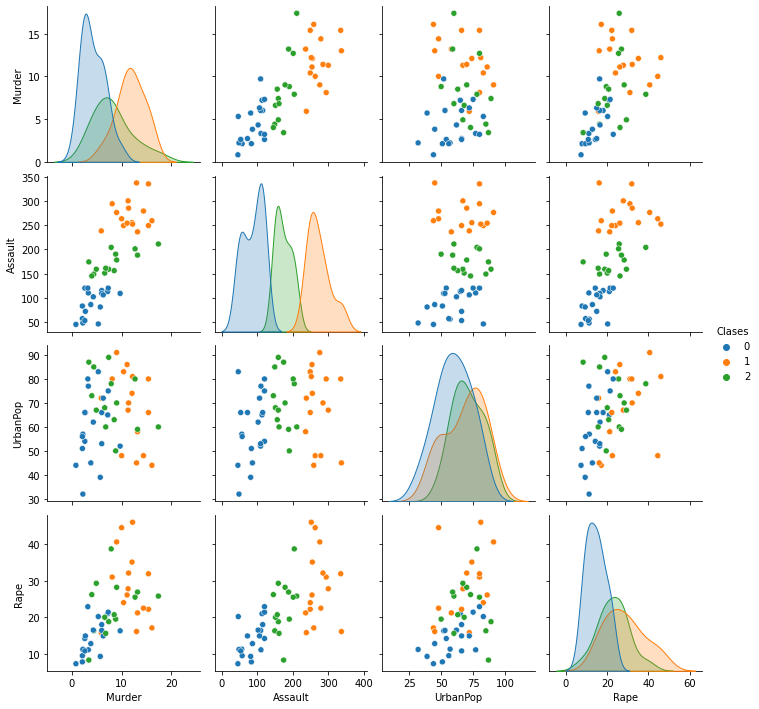

In [ ]:
ag_clustering = AgglomerativeClustering(n_clusters=3).fit(X_raw)
y_pred = ag_clustering.fit_predict(X_raw)
clases= y_pred
X_clustering = X_raw.assign(Clases=clases)
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10")

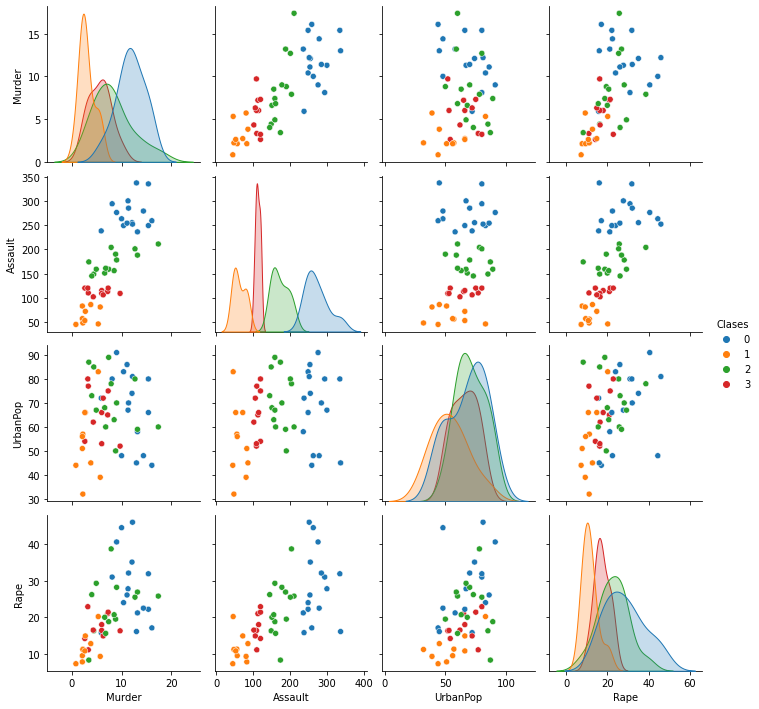

In [ ]:
ag_clustering = AgglomerativeClustering(n_clusters=4).fit(X_raw)
y_pred = ag_clustering.fit_predict(X_raw)
clases= y_pred
X_clustering = X_raw.assign(Clases=clases)
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10")

#Propagación

In [ ]:
from sklearn.cluster import AffinityPropagation

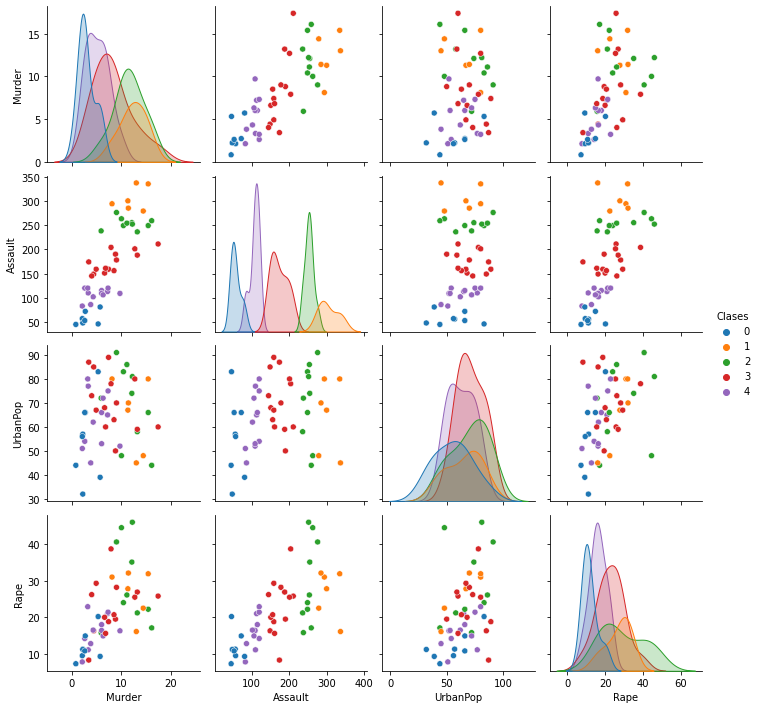

In [ ]:
af = AffinityPropagation().fit(X_raw)
y_pred = af.fit_predict(X_raw)
clases= y_pred
X_clustering = X_raw.assign(Clases=clases)
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10")

## Conclusiones

Se evaluaron diferentes métodos de clustering, con diferentes cantidad de clusters o grupos.
En el caso de Kmeans, el cual hay que pasar la cantidad de cluster.
Se obtuvieron los mejores resultados con 2 y 3 clases.
En el caso de 3 clases, no se observa una tendencia clara en el agrupamiento entre Población Urbana y Cantidad de secuenstros.

También se realizó una reducción de la dimensionalidad con PCA y luego se aplicó Kmeans, no se encontraron mejores resultados que con Kmeans directo.

En el caso de DBscan, no se obtuvo ninguna clase. La respuesta fue -1. Esto es debido a que no puedo diferenciar las clases, ya que este algortimo es capaz se agrupar zonas de alta densidad separadas con zonas de baja densidad, lo que en este conjunto de datos no ocurre.

En el Cluster Aglomerativo, se obtuvieron resultados similares a Kmeans.

En el caso de propagación de afinidad, el algortimo determinó que existen 5 clases. Aunque no logró encontrar una tendencia entre la variable de Población Urbana y las demás variables.


## Kmeans con standardNormalization
De acuerdo a los resultados anteriores, se decidió evaluar los resultados con Kmeans para 2 y para 3 cluster con StandardNormalization

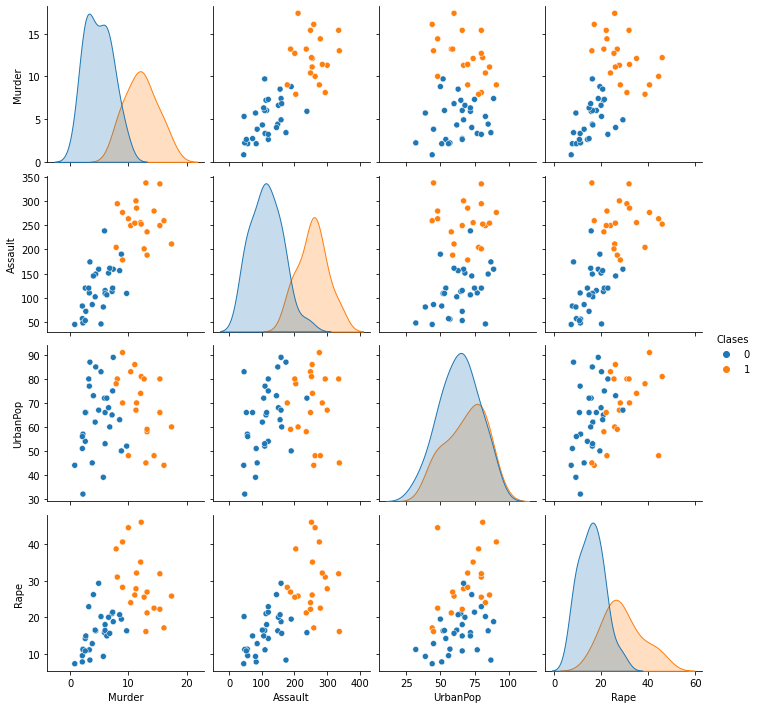

In [ ]:
X_stand = StandardScaler().fit_transform(X_raw)
k_means = KMeans(init="k-means++", n_clusters=2, n_init=10)
k_means.fit(X_stand)
y_pred = k_means.fit_predict(X_stand)
clases= y_pred
X_clustering = X_raw.assign(Clases=clases)
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10")


En este caso, se podría nombrar a las clase 1 Muy Violento.

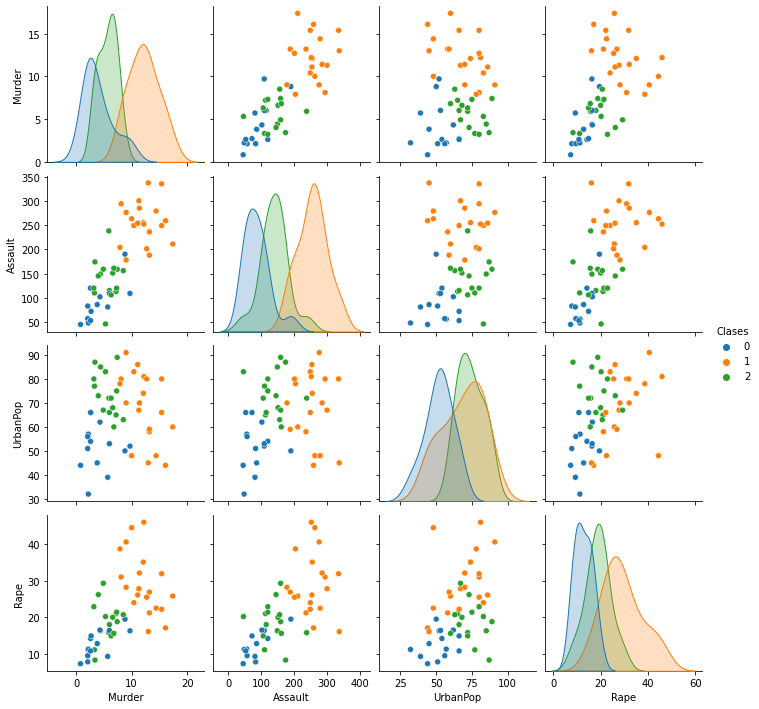

In [ ]:
X_stand = StandardScaler().fit_transform(X_raw)

k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)
k_means.fit(X_stand)
y_pred = k_means.fit_predict(X_stand)
clases= y_pred
X_clustering = X_raw.assign(Clases=clases)
sns.pairplot(X_clustering, diag_kind="kde", hue="Clases", palette= "tab10", labels)



En este caso se podría llamar a la clase 1 (naranja) como Muy Violenta, a la clase 2 (verde) como Violenta, y la clase 0 (azul) como Violencia baja. 